In [7]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
import matplotlib.pyplot as plt

In [8]:

transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5), (0.5))
])

train_data = datasets.MNIST(root='./home/manchik-pt7714/Documents/ML Tasks/data', train=True, transform=transform, download=True)
test_data = datasets.MNIST(root='./home/manchik-pt7714/Documents/ML Tasks/data', train=False, transform=transform, download=True)

train_load = torch.utils.data.DataLoader(train_data, batch_size=100, shuffle=True)
test_load = torch.utils.data.DataLoader(test_data, batch_size=100, shuffle=False)

In [9]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(32 * 13 * 13, 150)
        self.fc2 = nn.Linear(150, 10)
        
    def forward(self, x):
        x = self.pool(torch.relu(self.conv1(x)))
        x = x.view(-1, 32 * 13 * 13)
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

                    
model = CNN()

In [10]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.0001)  

In [11]:
count = 100
train_losses = []

for epoch in range(count):
    epoch_loss = 0.0
    for images, labels in train_load:
        outputs = model(images)
        loss = criterion(outputs, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        epoch_loss += loss.item()


    train_losses.append(epoch_loss / len(train_load))
    print(f"Epoch {epoch + 1}/{count}, Loss: {train_losses[-1]:.4f}")

Epoch 1/100, Loss: 0.5191
Epoch 2/100, Loss: 0.1851
Epoch 3/100, Loss: 0.1298
Epoch 4/100, Loss: 0.1011
Epoch 5/100, Loss: 0.0834
Epoch 6/100, Loss: 0.0724
Epoch 7/100, Loss: 0.0625
Epoch 8/100, Loss: 0.0560
Epoch 9/100, Loss: 0.0505
Epoch 10/100, Loss: 0.0458
Epoch 11/100, Loss: 0.0423
Epoch 12/100, Loss: 0.0386
Epoch 13/100, Loss: 0.0356
Epoch 14/100, Loss: 0.0327
Epoch 15/100, Loss: 0.0303
Epoch 16/100, Loss: 0.0279
Epoch 17/100, Loss: 0.0258
Epoch 18/100, Loss: 0.0236
Epoch 19/100, Loss: 0.0218
Epoch 20/100, Loss: 0.0201
Epoch 21/100, Loss: 0.0188
Epoch 22/100, Loss: 0.0169
Epoch 23/100, Loss: 0.0154
Epoch 24/100, Loss: 0.0140
Epoch 25/100, Loss: 0.0132
Epoch 26/100, Loss: 0.0118
Epoch 27/100, Loss: 0.0107
Epoch 28/100, Loss: 0.0098
Epoch 29/100, Loss: 0.0092
Epoch 30/100, Loss: 0.0082
Epoch 31/100, Loss: 0.0072
Epoch 32/100, Loss: 0.0067
Epoch 33/100, Loss: 0.0060
Epoch 34/100, Loss: 0.0055
Epoch 35/100, Loss: 0.0049
Epoch 36/100, Loss: 0.0043
Epoch 37/100, Loss: 0.0040
Epoch 38/1

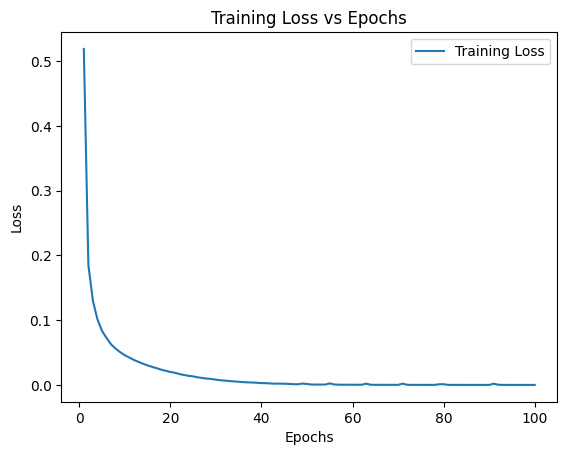

In [12]:
plt.plot(range(1, count + 1), train_losses, label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss vs Epochs')
plt.legend()
plt.show()